In [375]:
#kütüphanelerimizi import ettik
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sea.set()
%matplotlib inline

In [376]:
#Veri setini yükleme
df = pd.read_csv("diabetes.csv")
#Veri setinin ilk 7 satırını görüntüleme
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [377]:
#Veri setinin temel istatiksel özeti
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [378]:
#veri setimiz 768 satır,9 sütundan oluşmaktadır
df.shape

(768, 9)

In [379]:
#Veri setinin genel yapısını anlamak için
#1-görüldüğü üzere 768 kayıtda null verimiz yok
#2-tüm değerler sayı formatında olduğu için label encoding yapmaya gerek yok
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [380]:
#DataFrame'deki her sütundaki eksik değerlerin toplam sayısını hesaplar.
#Bu yöntem, her bir sütundaki eksik değerlerin sayısını verir.
#Görüldüğü üzere 768 kayıtda null verimiz yok
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [381]:
#boş değer kontrolü
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

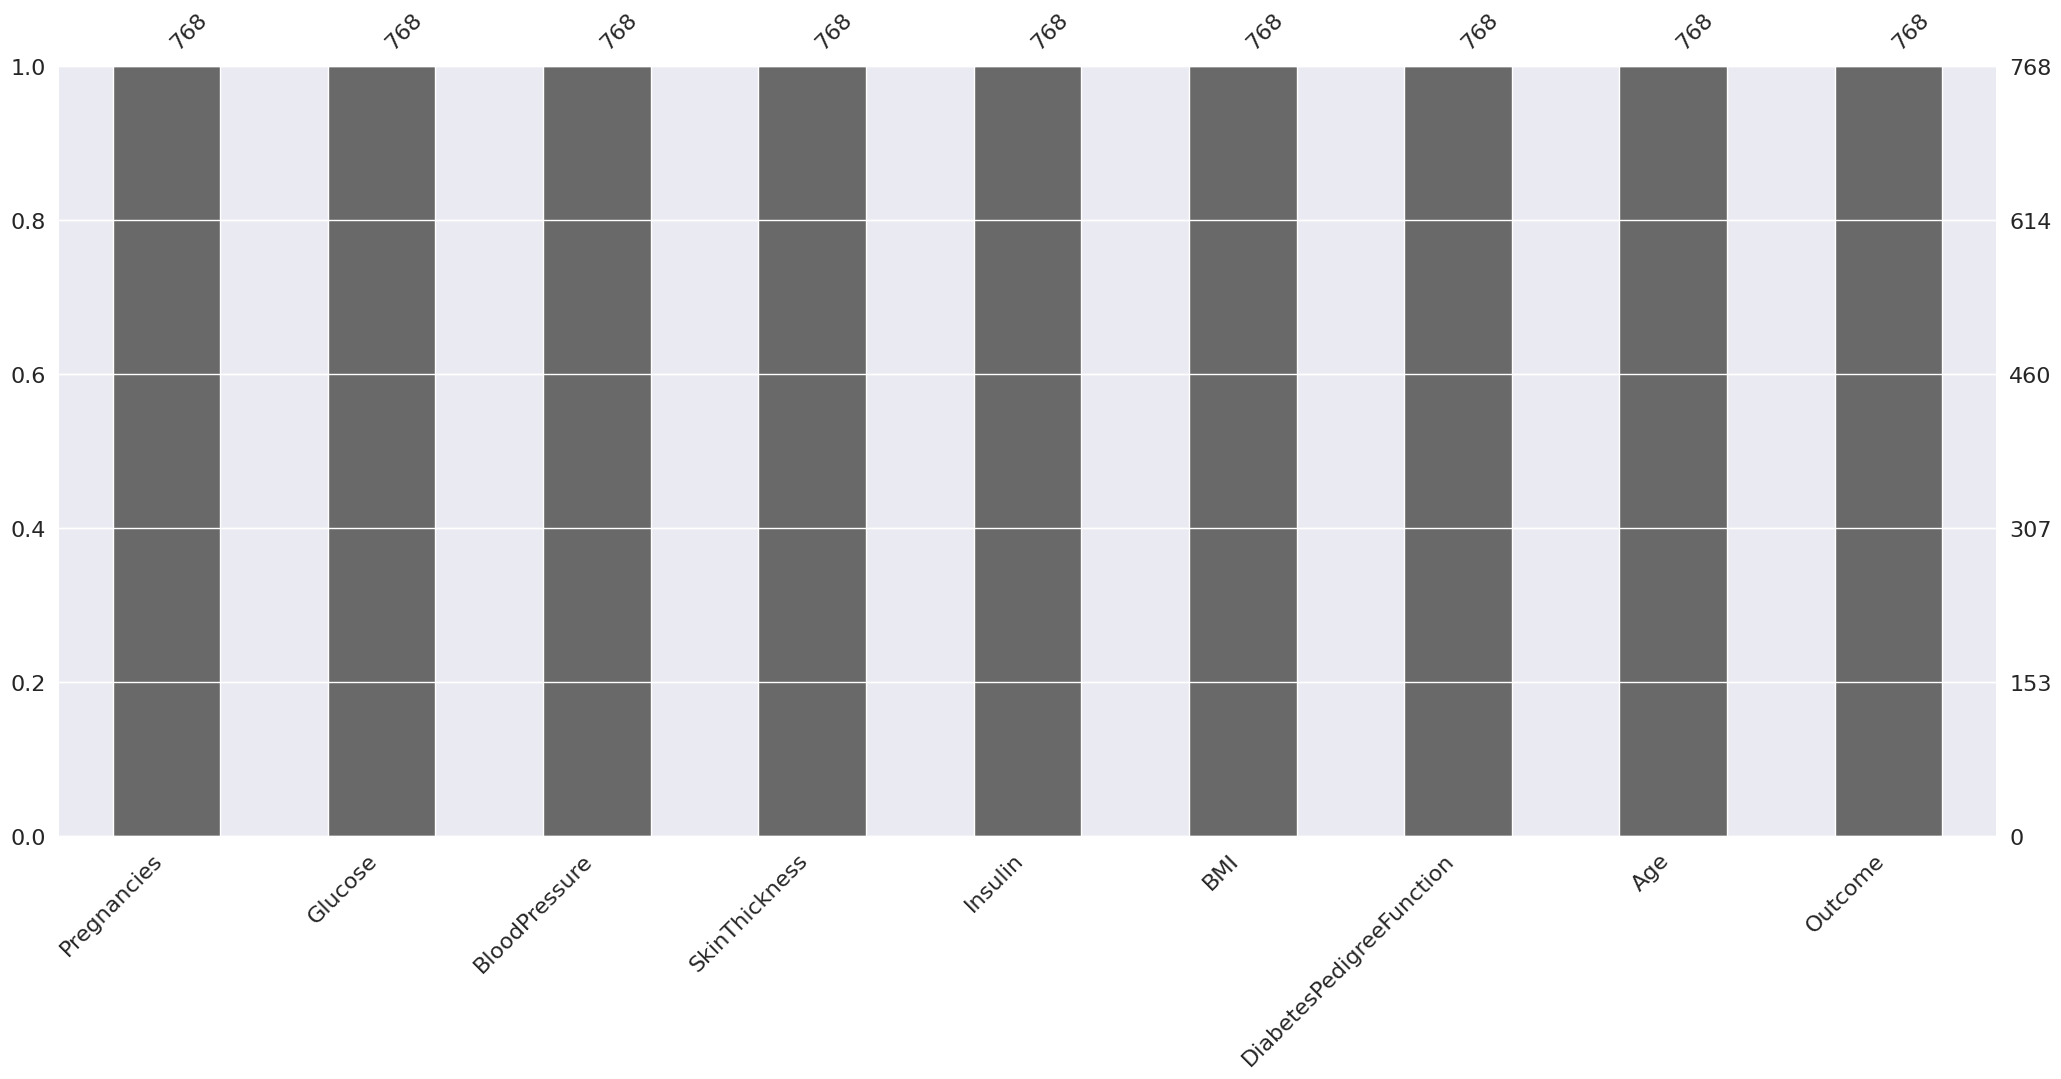

In [382]:
#eksik verileri görsel olarak
#Görüldüğü üzere eksik değerler bulunmamaktadır
import missingno as ms
ms.bar(df)
plt.show()


In [383]:
#Exploratory Data Analysis
#Correlation Matrix
#Değişkenler arasındaki ilişkileri daha iyi anlamak için veri analizi ve modellemede faydalı olabilir.
#İki değişken arasındaki istatistiksel ilişkiye korelasyon denir.
#Bir korelasyon pozitif olabilir, yani her iki değişken de aynı yönde hareket eder veya negatif olabilir,
#Yani bir değişkenin değeri arttığında diğer değişkenlerin değerleri azalır. Korelasyon aynı zamanda sinirsel veya sıfır da olabilir, yani değişkenler ilgisizdir.

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

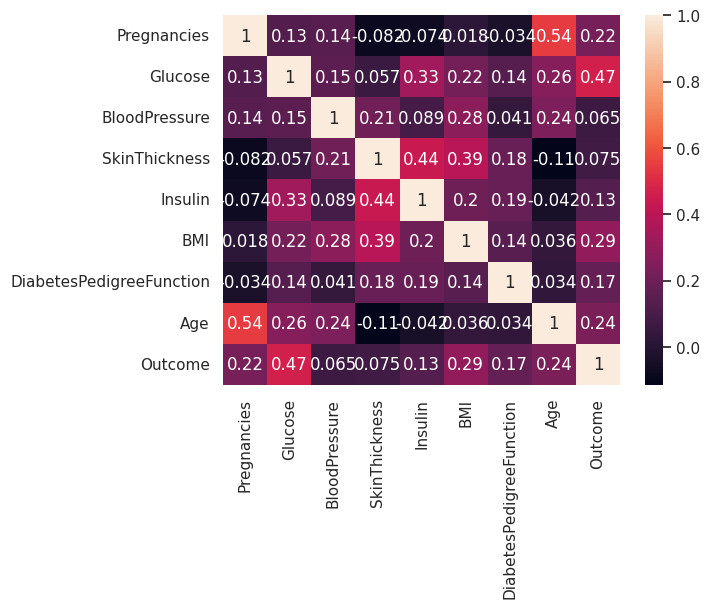

In [384]:
#Correlation Matrix görseli

sea.heatmap(df.corr(),cbar=True,annot=True)

In [385]:
"""---------Veri setimizi düzenleme---------
describe metoduyla görebildiğimiz gibi sıfır değeri bir anlam ifade etmez ve bu nedenle
eksik değeri gösterir. Bu sütunları düzeltmemiz gerekir.

Glucose
BloodPressure
SkinThickness
Insulin
"""

'---------Veri setimizi düzenleme---------\ndescribe metoduyla görebildiğimiz gibi sıfır değeri bir anlam ifade etmez ve bu nedenle\neksik değeri gösterir. Bu sütunları düzeltmemiz gerekir.\n\nGlucose\nBloodPressure\nSkinThickness\nInsulin\n'

<Axes: >

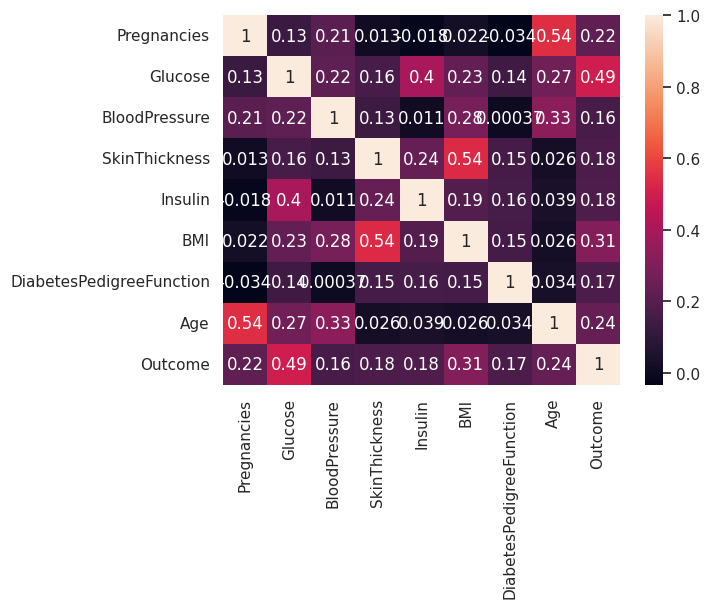

In [386]:
#Bu kod parçası, veri setindeki sıfır değerlerini ortalama değerlerle doldurarak,
#veri setindeki eksik veya hatalı verileri düzeltmeye çalışır.
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

for i in col:
  df[i].replace(0,df[i].mean(),inplace=True)
#Görüldüğü üzere 0 yakın(ilişkisiz olan) korelasyonları bir miktar  düzeltmiş (attırmış) olduk
sea.heatmap(df.corr(),cbar=True,annot=True)

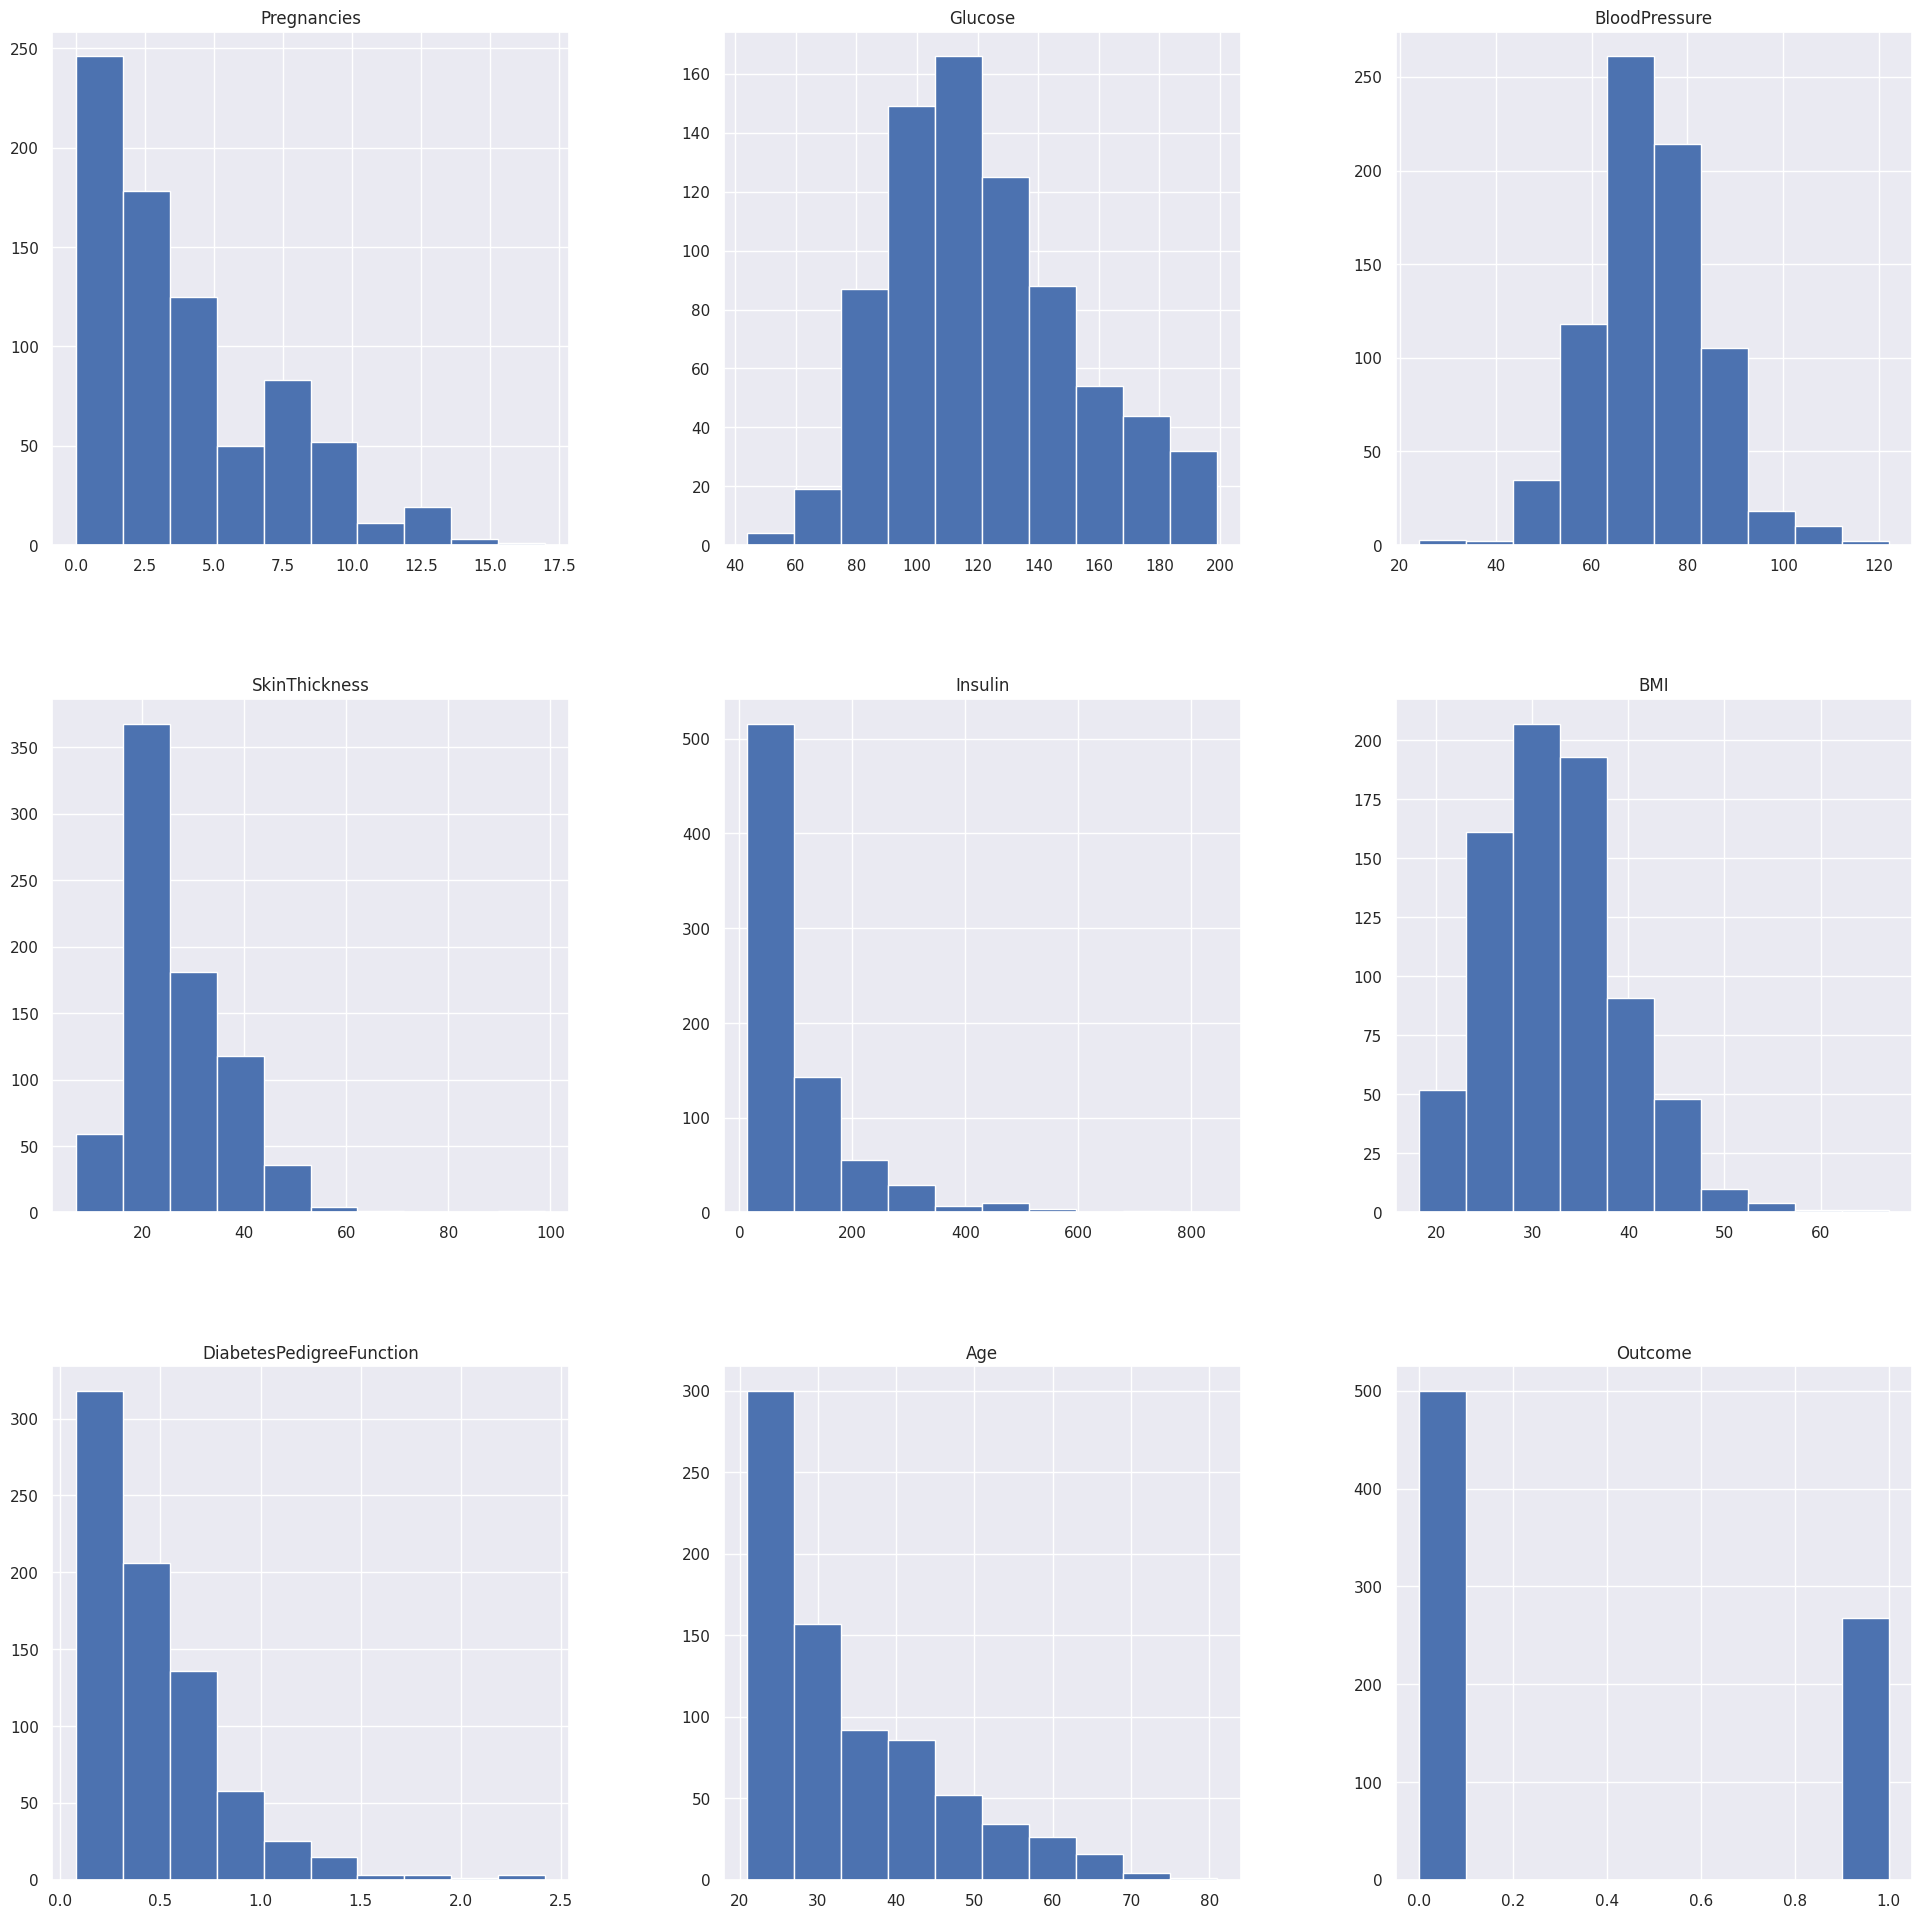

In [387]:
#Veri setindeki değerlerin dağılımını görselleştirmek için hist kullandık
#outcome sütundaki değerlerimiz şunu göstermektedir
#0 - > sağlıklı 1->şeker hastası
df.hist(figsize = (24,24))
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

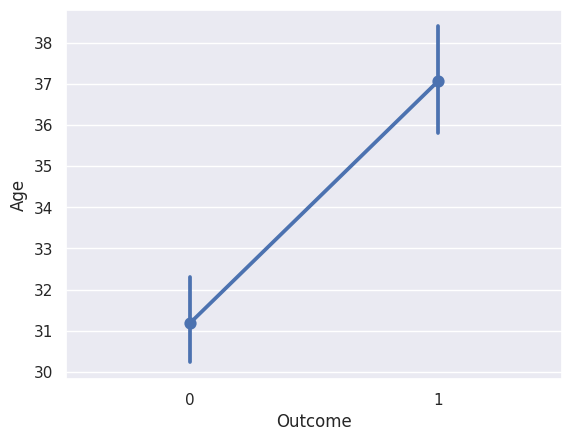

In [388]:
#yaşa göre şeker hastalığı
sea.pointplot(x='Outcome', y= 'Age', data=df)

<Axes: xlabel='Age', ylabel='Insulin'>

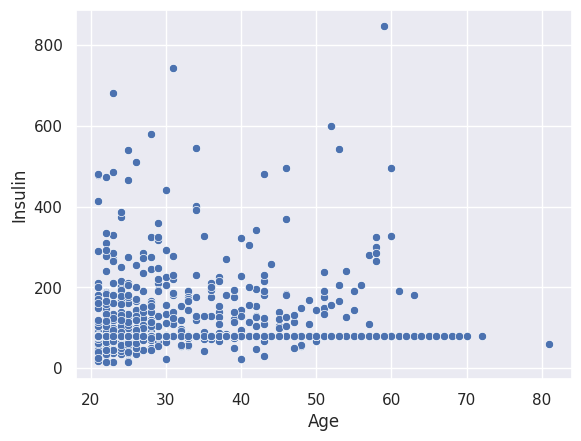

In [389]:
#yasa göre insulin dağılımı
sea.scatterplot(x='Age',y='Insulin',data=df)

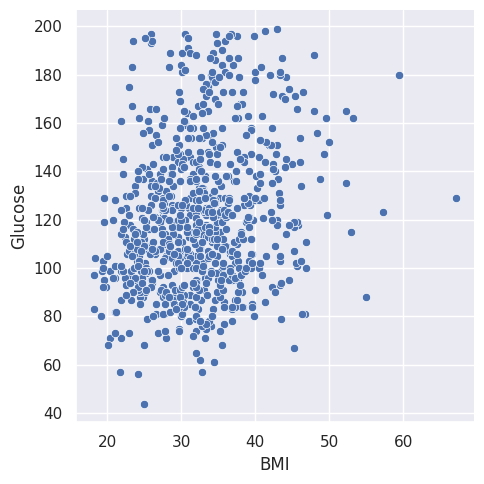

In [390]:
#bmi (vücut kitle endeksine göre glikoz)
sea.relplot(x='BMI', y= 'Glucose', data=df)

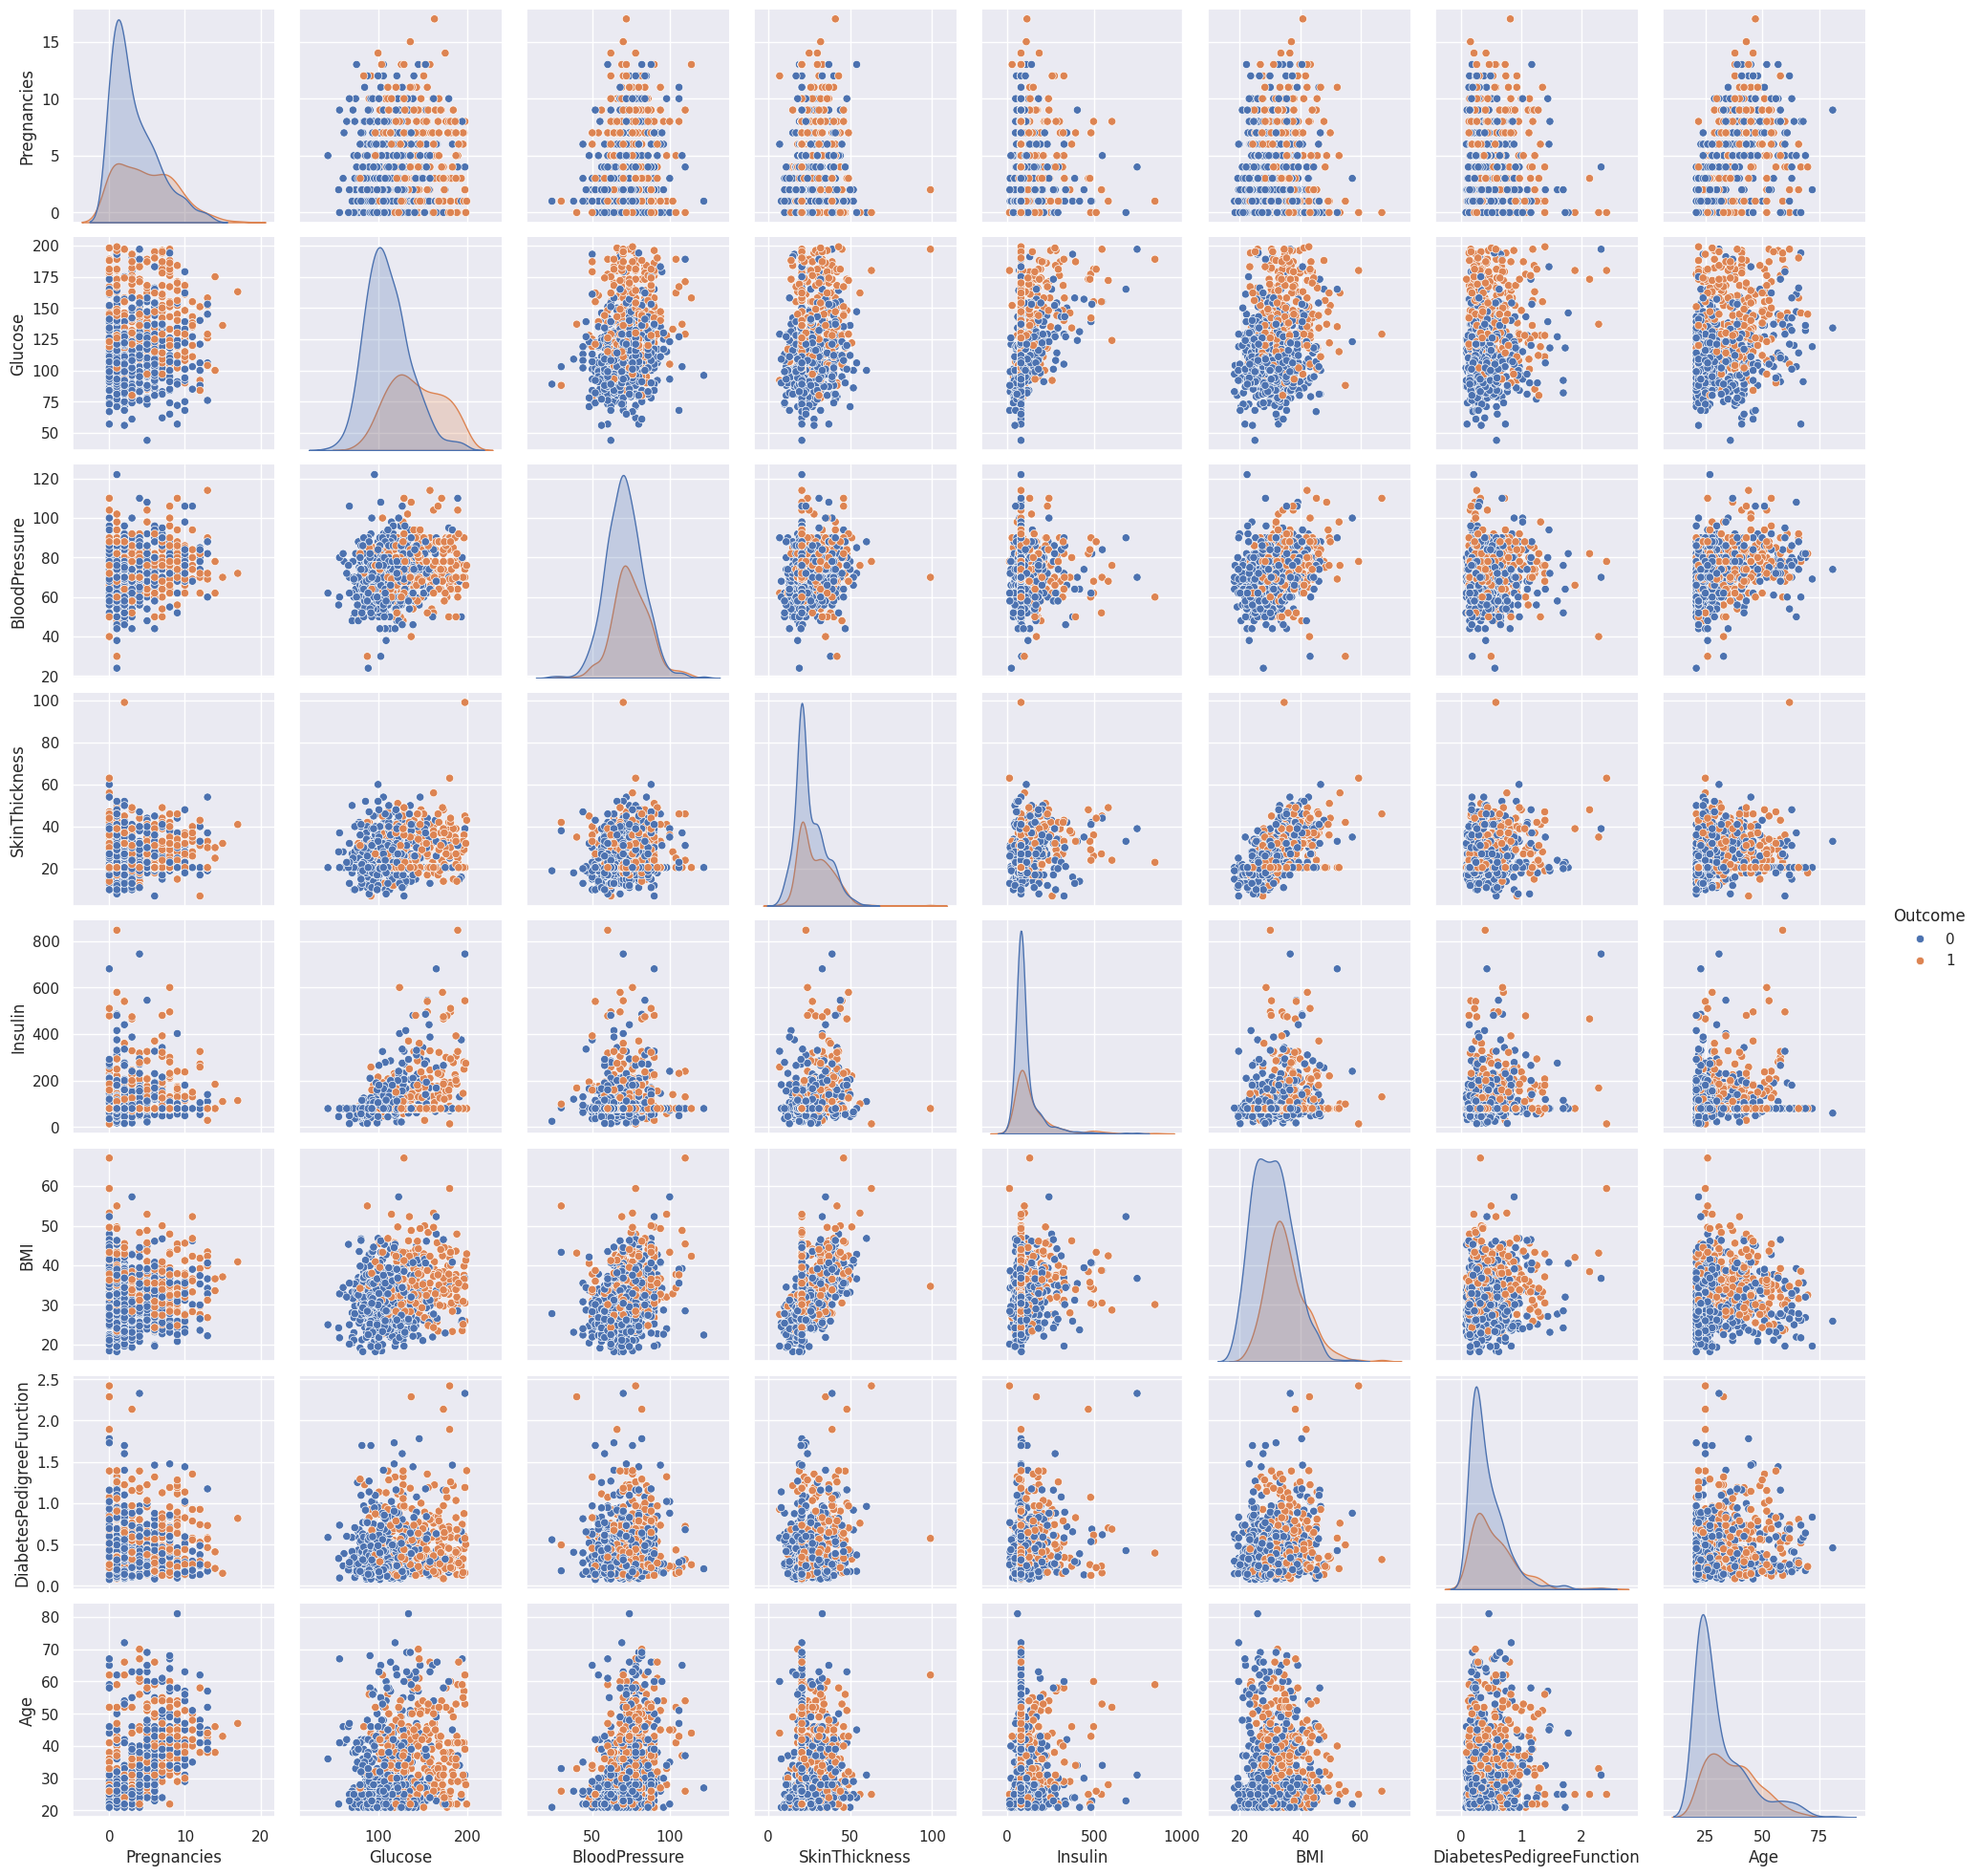

In [391]:
"""Pairplot
İki değişken arasındaki ilişkiyi açıklamak veya en ayrık kümeleri oluşturmak için en iyi
özellik kümesini anlamak için kullanılır. Ayrıca veri setimizde bazı basit çizgiler
çizerek veya doğrusal ayırma yaparak bazı basit sınıflandırma modellerinin
oluşturulmasına da yardımcı olur."""

sea.pairplot(df,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

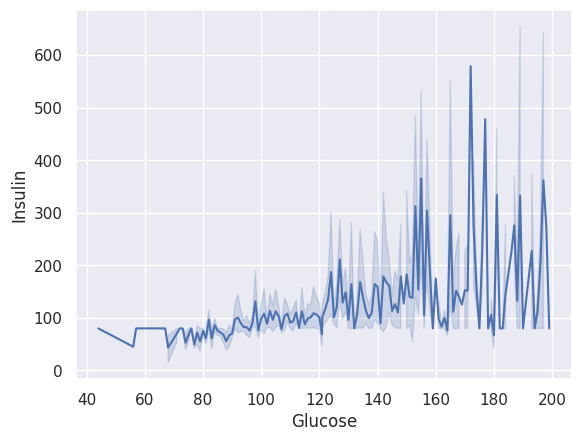

In [392]:
#insülin ve şeker ilişkisi
sea.lineplot(x='Glucose', y= 'Insulin', data=df)

In [393]:
from sklearn.model_selection import train_test_split

#veri setimizi trainig ve test olarak ayırıyoruz

X = df.drop(columns = 'Outcome')
y = df['Outcome']

#test verisi yüzde 30 olarak ayırdık
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.2,random_state=3)


In [540]:
#--------------Modeller--------------
#Logistic regresyon
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#C parametresi, regülerleştirme katsayısını belirler. Regülerleştirme, aşırı uyum (overfitting) problemlerini önlemek için kullanılan bir tekniktir. Küçük C değerleri daha fazla regülerleştirme uygularken, büyük C değerleri daha az regülerleştirme uygular. Varsayılan değeri 1'dir.
#Yüksek bir C değeri, modelin eğitim verilerine daha iyi uymasını sağlar, ancak aşırı uyuma neden olabilir.
#Düşük bir C değeri, modelin daha fazla regülerleştirilmesine neden olur, bu da genelleştirme yeteneğini artırabilir, ancak modelin eğitim verilerine uyumunu azaltabilir.

#penalty parametresi, kullanılacak ceza türünü belirler. İki yaygın seçenek vardır: 'l1' (Lasso regresyonu) ve 'l2' (Ridge regresyonu).
#'l1' cezası, ağırlıkların bazılarını sıfıra indirerek özellik seçimi yapar. Bu, modelin daha az önemli özelliklerle daha iyi performans göstermesini sağlayabilir.
#'l2' cezası, ağırlıkların büyüklüğünü küçültür ve modelin aşırı uyuma karşı daha dirençli olmasını sağlar.
#Varsayılan değeri 'l2'dir.
#Örneğin, LogisticRegression(C=1, penalty='l2') ifadesi, C=1 ve 'l2' cezasıyla bir lojistik regresyon modeli oluşturur. Bu, regülerleştirme katsayısının varsayılan değeri olan 1 ve 'l2' cezasının kullanıldığı bir model oluşturur.

#veri setimizi eğitiyoruz
#en optimal parametreler bunlar
log_reg = LogisticRegression(C=3.5,penalty='l2',solver='lbfgs',multi_class='ovr',max_iter=100)
log_reg.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=log_reg.predict(X_test)


#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")


log_acc=accuracy_score(Y_test,log_reg.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))



Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.75      0.58      0.65        62

    accuracy                           0.75       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[80 12]
 [26 36]] 

Train Set Accuracy:79.15309446254072
Test Set Accuracy:75.32467532467533


In [541]:
#KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#n_neigher 16 en yüksek accuracy değeri sağlar
knn = KNeighborsClassifier(n_neighbors=16,weights='distance')
knn.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=knn.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

knn_acc = accuracy_score(Y_test,knn.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))


Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        92
           1       0.72      0.53      0.61        62

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.73      0.73      0.72       154

Confusion Matrix:
 [[79 13]
 [29 33]] 

Train Set Accuracy:100.0
Test Set Accuracy:72.72727272727273


In [542]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#max_depth 5 en yüksek accuracy değeri sağlar
#gini veya entropy secim gini max = 66.66
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best')
dtc.fit(X_train, Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=dtc.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        92
           1       0.69      0.56      0.62        62

    accuracy                           0.72       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[76 16]
 [27 35]] 

Train Set Accuracy:84.03908794788273
Test Set Accuracy:72.07792207792207


In [543]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#kerner olarak lineer seçimi en iyi sonucu verir
svm = SVC(kernel='linear')
svm.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=svm.predict(X_test)


#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

svm_acc= accuracy_score(Y_test,svm.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78        92
           1       0.70      0.53      0.61        62

    accuracy                           0.72       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.72      0.72      0.71       154

Confusion Matrix:
 [[78 14]
 [29 33]] 

Train Set Accuracy:78.66449511400651
Test Set Accuracy:72.07792207792207


In [544]:
#XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.5, max_depth=6,n_estimators = 17)
xgb.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=xgb.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        92
           1       0.70      0.63      0.66        62

    accuracy                           0.74       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
 [[75 17]
 [23 39]] 

Train Set Accuracy:99.51140065146579
Test Set Accuracy:74.02597402597402


In [545]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=gbc.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76        92
           1       0.65      0.52      0.58        62

    accuracy                           0.69       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154

Confusion Matrix:
 [[75 17]
 [30 32]] 

Train Set Accuracy:92.18241042345277
Test Set Accuracy:69.48051948051948


In [546]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=gnb.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

nav_acc=accuracy_score(Y_test,gnb.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gnb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gnb.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        92
           1       0.67      0.60      0.63        62

    accuracy                           0.72       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[74 18]
 [25 37]] 

Train Set Accuracy:75.8957654723127
Test Set Accuracy:72.07792207792207


In [547]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#parametreler n_estimators-100,criterion(gini,entropy),max_depth,min_samples_split,min_samples_leaf,max_features,random_state
rfc=RandomForestClassifier(criterion="entropy",min_samples_split=2)
rfc.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=rfc.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

rfc_acc=accuracy_score(Y_test,rfc.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,rfc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,rfc.predict(X_test))*100))


Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79        92
           1       0.72      0.55      0.62        62

    accuracy                           0.73       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[79 13]
 [28 34]] 

Train Set Accuracy:100.0
Test Set Accuracy:73.37662337662337


In [548]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#AdaBoostClassifier(base_estimator="") parametresi None,classifier,regressor,CustomModel alabilir
#base_estimator,n_estimators,learning_rate,algorithm,random_state
adb = AdaBoostClassifier()
adb.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=adb.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

adb_acc=accuracy_score(Y_test,adb.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,adb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,adb.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        92
           1       0.70      0.56      0.62        62

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[77 15]
 [27 35]] 

Train Set Accuracy:82.08469055374593
Test Set Accuracy:72.72727272727273


In [549]:
#ExtraTreesClassifier
#RandomForestClassifier'ın bir türevidir.
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#veri setimizi eğitiyoruz
#AdaBoostClassifier(base_estimator="") parametresi None,classifier,regressor,CustomModel alabilir
#n_estimators: Oluşturulacak olan ağaç sayısıdır. Bu, genellikle ne kadar çok ağaç oluşturulacağını belirler.
#random_state: Rastgele sayı üreteci için bir tohum değeri sağlar. Bu, algoritmanın tekrarlanabilir olmasını sağlar.
etc = ExtraTreesClassifier(n_estimators=500, random_state=0)
etc.fit(X_train,Y_train)

#modelimizi test veri setimizle tahmin yürütüyoruz
y_pred=etc.predict(X_test)

#raporlama
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred),"\n")

etc_acc=accuracy_score(Y_test,etc.predict(X_test))*100

print("Train Set Accuracy:"+str(accuracy_score(Y_train,etc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,etc.predict(X_test))*100))

Classification Report is:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        92
           1       0.82      0.58      0.68        62

    accuracy                           0.78       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.78      0.77       154

Confusion Matrix:
 [[84  8]
 [26 36]] 

Train Set Accuracy:100.0
Test Set Accuracy:77.92207792207793


In [550]:
#Accuracy açısından sıralama
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier',  'XgBoost' , 'Naive Bayes',
              "Random Forest","Ada Boost","ExtraTrees"],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,nav_acc,rfc_acc,adb_acc,etc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,ExtraTrees,77.922078
0,Logistic,75.324675
5,XgBoost,74.025974
7,Random Forest,73.376623
1,KNN,72.727273
8,Ada Boost,72.727273
2,SVC,72.077922
3,Decision Tree Classifier,72.077922
6,Naive Bayes,72.077922
4,Gradient Boosting Classifier,69.480519


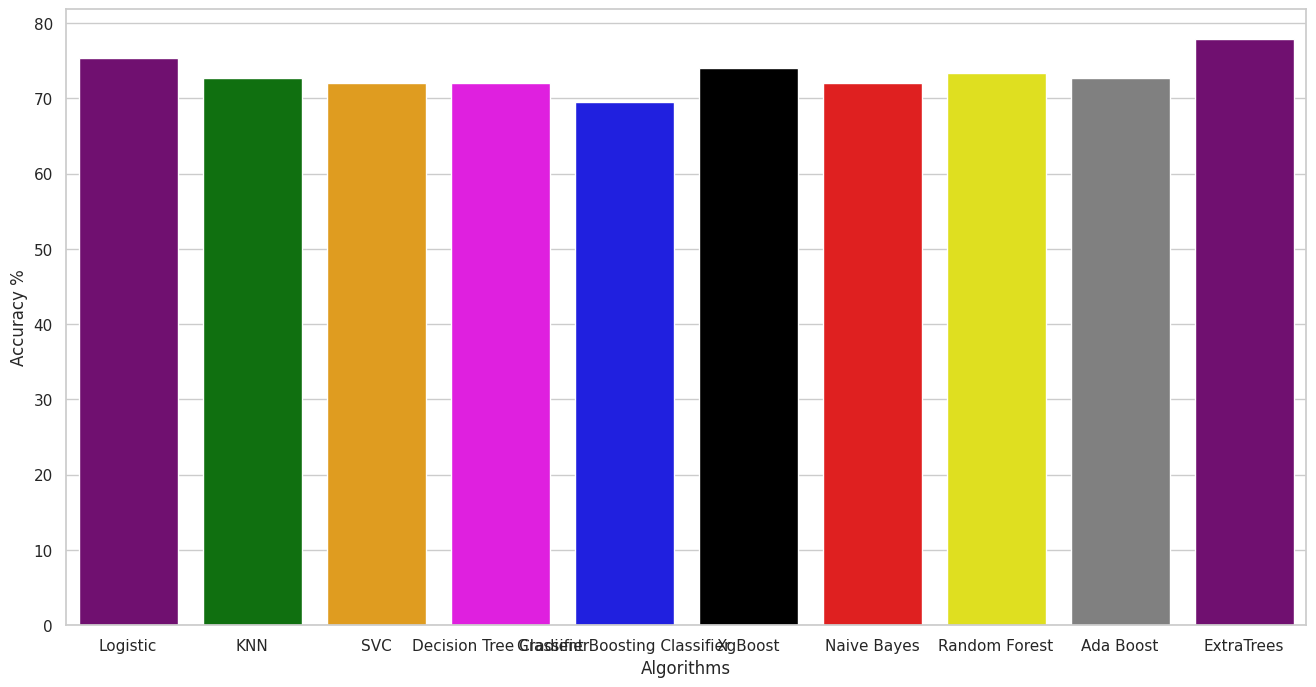

In [552]:
##Accuracy açısından görsel sıralama
colors = ["purple", "green", "orange", "magenta","blue","black","red","yellow","grey","purple"]

sea.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sea.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()


In [553]:
#sonuç olarak;
#f1 score, Accuracy, ve confusion_matrix en iyi sınıflandırma algıritması
################# ExtraTreesClassifierdir#################
